# Анализ данных: mushrooms

Этот notebook содержит полный анализ данных из файла

## Содержание:
1. Загрузка и просмотр данных
2. Основная статистика
3. Информация о данных
4. Анализ пропущенных значений
5. Анализ категориальных переменных
6. Визуализация данных
7. Корреляционный анализ


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

print('📊 Библиотеки загружены успешно!')

📊 Библиотеки загружены успешно!


## 1. Загрузка и первичный просмотр данных


In [56]:
df = pd.read_csv('mushrooms.csv')

print(f'Данные загружены: {len(df)} строк, {len(df.columns)} столбцов')

Данные загружены: 8124 строк, 23 столбцов


In [57]:
print('Первые 5 строк:')
df.head()

Первые 5 строк:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [58]:
print('Полный датафрейм:')
df

Полный датафрейм:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


## 2. Основная статистика


In [59]:
print('📈 Описательная статистика:')
df.describe()

📈 Описательная статистика:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [60]:
print('📊 Статистика для всех типов данных:')
df.describe(include='all')

📊 Статистика для всех типов данных:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 3. Информация о структуре данных


In [8]:
# Общая информация о датафрейме
print('ℹ️ Информация о данных:')
df.info()

ℹ️ Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  

In [9]:
# Типы данных в каждом столбце
print('🔢 Типы данных:')
print(df.dtypes)
print('\n📏 Размер данных:', df.shape)

🔢 Типы данных:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

📏 Размер данных: (8124, 23)


## 4. Анализ пропущенных значений


In [10]:
# Количество пропущенных значений в каждой колонке
print('❌ Пропущенные значения:')
missing_data = df.isnull().sum()
missing_percent = 100 * df.isnull().sum() / len(df)

missing_table = pd.DataFrame({
    'Пропущено': missing_data,
    'Процент': missing_percent
})
missing_table = missing_table[missing_table['Пропущено'] > 0].sort_values('Пропущено', ascending=False)

if len(missing_table) > 0:
    print(missing_table)
else:
    print('✅ Пропущенных значений не найдено!')

❌ Пропущенные значения:
✅ Пропущенных значений не найдено!


## 5. Анализ категориальных переменных


In [11]:
# Анализ уникальных значений для каждой колонки
print('🔍 Уникальные значения в каждой колонке:')
for col in df.columns:
    unique_count = df[col].nunique()
    print(f'{col}: {unique_count} уникальных значений')
    
    # Показываем value_counts для категориальных переменных (менее 20 уникальных значений)
    if unique_count < 20 and unique_count > 1:
        print(f'  Распределение значений:')
        print(df[col].value_counts().head(10))
        print()

🔍 Уникальные значения в каждой колонке:
class: 2 уникальных значений
  Распределение значений:
class
e    4208
p    3916
Name: count, dtype: int64

cap-shape: 6 уникальных значений
  Распределение значений:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface: 4 уникальных значений
  Распределение значений:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color: 10 уникальных значений
  Распределение значений:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises: 2 уникальных значений
  Распределение значений:
bruises
f    4748
t    3376
Name: count, dtype: int64

odor: 9 уникальных значений
  Распределение значений:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment: 2 уникальных значений
  Распределение значений:
gill-a

## 6. Визуализация данных


In [12]:
# Определяем числовые и категориальные колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'📊 Числовые колонки ({len(numeric_cols)}): {numeric_cols}')
print(f'📝 Категориальные колонки ({len(categorical_cols)}): {categorical_cols}')

📊 Числовые колонки (0): []
📝 Категориальные колонки (23): ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [13]:
# Гистограммы для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'Распределение: {col}')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Частота')
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения гистограмм не найдено.')

Числовых переменных для построения гистограмм не найдено.


In [14]:
# Boxplot для числовых переменных
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(numeric_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].boxplot(df[col].dropna())
        axes[row, col_idx].set_title(f'Boxplot: {col}')
        axes[row, col_idx].set_ylabel(col)
    
    # Скрываем пустые подграфики
    for i in range(len(numeric_cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print('Числовых переменных для построения boxplot не найдено.')

Числовых переменных для построения boxplot не найдено.


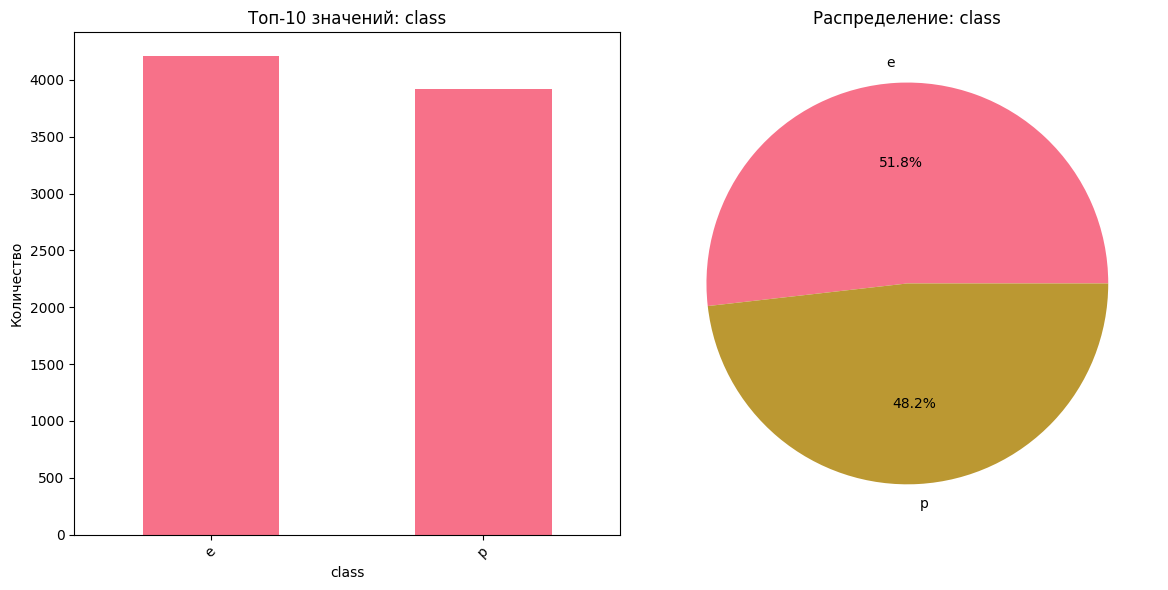

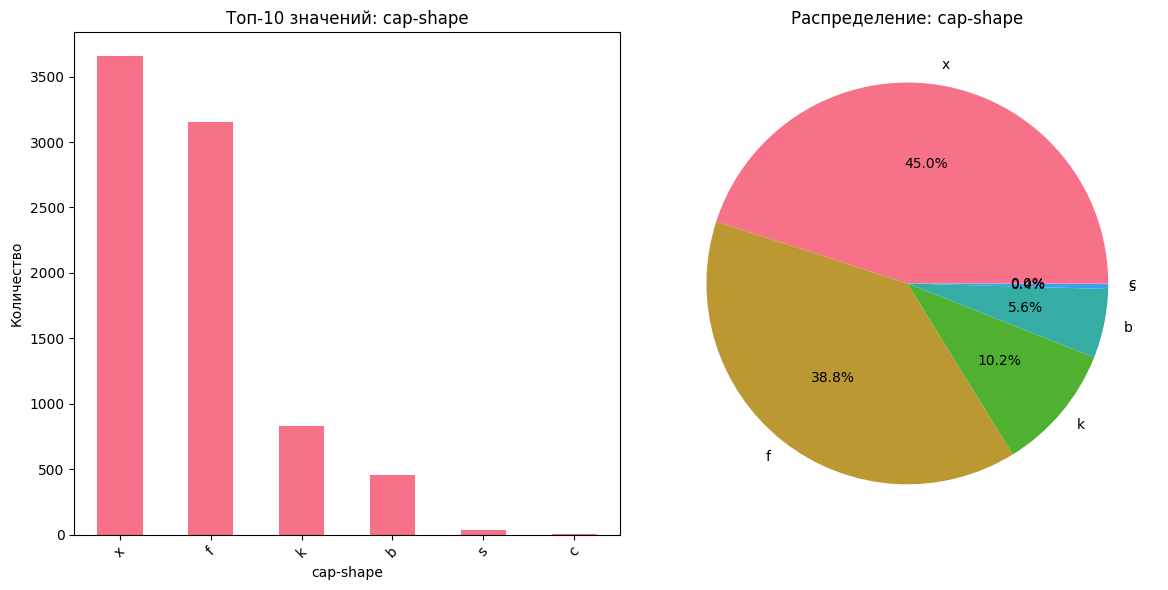

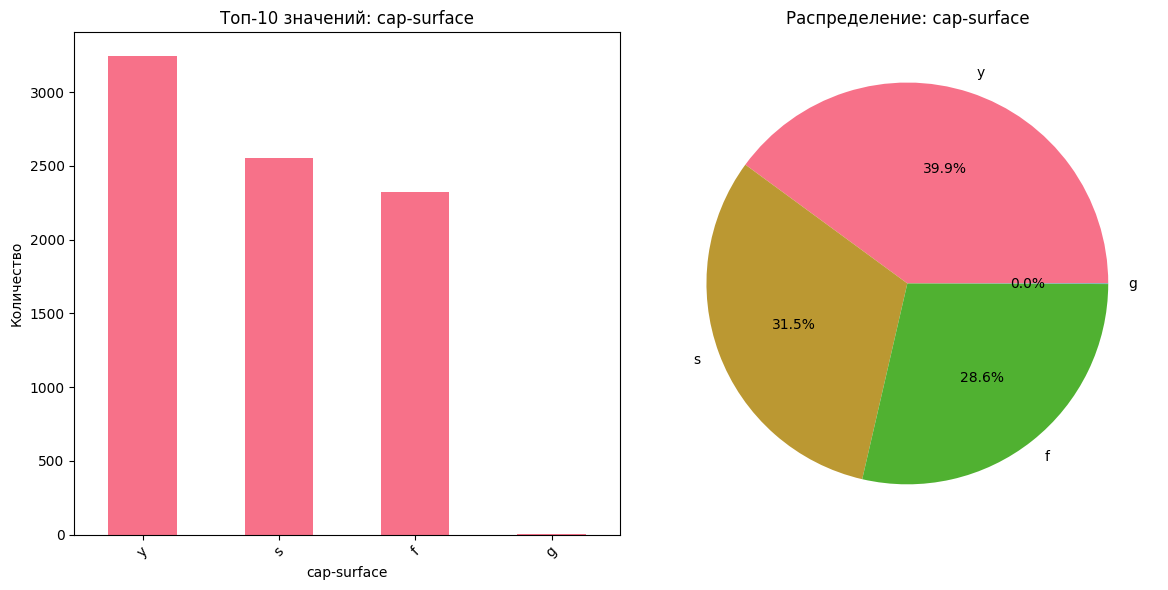

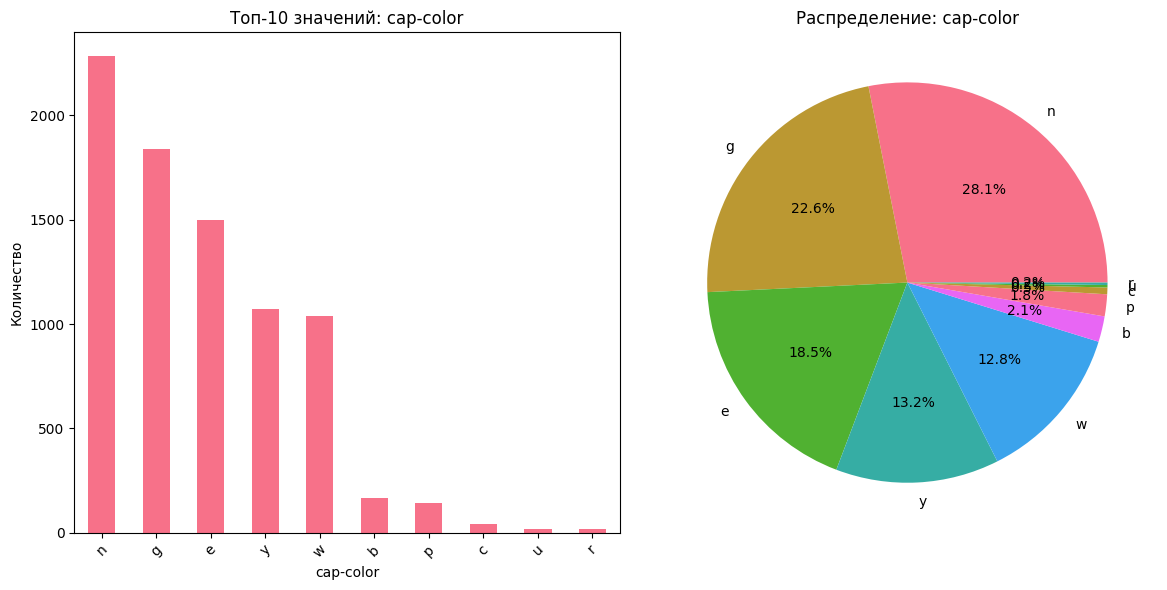

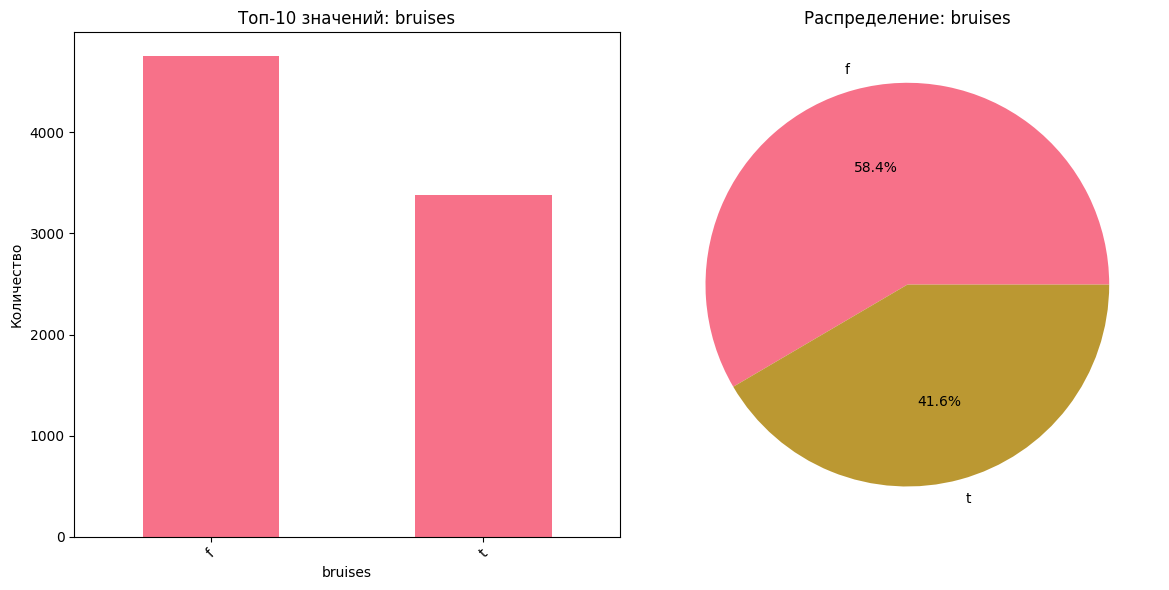

In [15]:
# Столбчатые диаграммы для категориальных переменных
if len(categorical_cols) > 0:
    for col in categorical_cols[:5]:  # Ограничиваем первыми 5 категориальными переменными
        plt.figure(figsize=(12, 6))
        
        # Берем топ-10 значений для отображения
        top_values = df[col].value_counts().head(10)
        
        plt.subplot(1, 2, 1)
        top_values.plot(kind='bar')
        plt.title(f'Топ-10 значений: {col}')
        plt.xticks(rotation=45)
        plt.ylabel('Количество')
        
        plt.subplot(1, 2, 2)
        top_values.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Распределение: {col}')
        plt.ylabel('')
        
        plt.tight_layout()
        plt.show()
else:
    print('Категориальных переменных не найдено.')

## 7. Корреляционный анализ


In [16]:
# Матрица корреляций для числовых переменных
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Матрица корреляций', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Показываем сильные корреляции
    print('🔗 Сильные корреляции (|r| > 0.7):')
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append({
                    'Переменная 1': correlation_matrix.columns[i],
                    'Переменная 2': correlation_matrix.columns[j],
                    'Корреляция': round(corr_val, 3)
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        print(strong_corr_df.to_string(index=False))
    else:
        print('Сильных корреляций не найдено.')
        
elif len(numeric_cols) == 1:
    print(f'Найдена только одна числовая переменная: {numeric_cols[0]}')
else:
    print('Числовых переменных для корреляционного анализа не найдено.')

Числовых переменных для корреляционного анализа не найдено.


## 8. Заключение

### Основные выводы:
- Размер данных: укажите количество строк и столбцов
- Качество данных: опишите наличие пропущенных значений
- Ключевые паттерны: опишите найденные закономерности
- Рекомендации: предложите дальнейшие шаги анализа

### Дальнейшие шаги:
1. Очистка данных (если необходимо)
2. Feature engineering
3. Машинное обучение (если применимо)
4. Создание дашборда или отчета


In [47]:
X = df.drop(['class'],axis=1)
y = df['class'].astype('category')

In [48]:
X = pd.get_dummies(df, columns=X.columns)

In [50]:
X.drop('class', axis=1, inplace=True)

In [51]:
y.dtypes

CategoricalDtype(categories=['e', 'p'], ordered=False, categories_dtype=object)

In [52]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.98      1.00      0.99       852
           p       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

